In [1]:
# Importing necessary libraries for data analysis and visualization
import os
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode

%matplotlib inline

# Importing necessary libraries for text preprocessing
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

# Importing libraries for creating wordclouds and resampling imbalanced datasets
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from imblearn.over_sampling import RandomOverSampler

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# Importing Libraries for Feature Extraction and Model Training

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix


In [3]:
# Mount the Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Read the CSV file from the drive
dataset = pd.read_excel('/content/drive/MyDrive/Data Folder/1000 leads.xlsx')

# Print the first few rows of the DataFrame
dataset.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Lead Name,Location,Status,Status information
0,Raja,hyderabad,Not Converted,"14/8/prema: share me details, available in evn..."
1,Anirudh Reddy,pune,Not Converted,"14/8/prema: cal me tmrw, shared details to ema..."
2,Sapna Dewani,bangalore,Converted,16|AuG|moHan:rnr
3,suresh,mumbai,Not Converted,14/8/17(Surendra):i want only Server 16|AuG|mo...
4,Akshay Shinde,hyderabad,Not Converted,"14/8/prema:rnr 16/8/prema: gave info, he said ..."


In [4]:
#dataset = pd.read_excel("1000 leads.xlsx")

In [5]:
dataset.T

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,1000
Lead Name,Raja,Anirudh Reddy,Sapna Dewani,suresh,Akshay Shinde,Karthik,atul dubey,praneeth,Smita Shinde,shiba,...,Vishal Shinde,seema,surekha bathula,karuna,chiranjeevi,vipin,dheeraj,kuldeep singh,ankur sharma,Saugata Chakrabarti
Location,hyderabad,pune,bangalore,mumbai,hyderabad,mumbai,delhi,pune,bangalore,bangalore,...,mumbai,bangalore,hyderabad,bangalore,gurgaon,bangalore,chennai,bangalore,bangalore,bangalore
Status,Not Converted,Not Converted,Converted,Not Converted,Not Converted,Not Converted,Not Converted,Not Converted,Not Converted,Not Converted,...,Not Converted,Not Converted,Not Converted,Not Converted,Not Converted,Not Converted,Not Converted,Not Converted,Not Converted,Not Converted
Status information,"14/8/prema: share me details, available in evn...","14/8/prema: cal me tmrw, shared details to ema...",16|AuG|moHan:rnr,14/8/17(Surendra):i want only Server 16|AuG|mo...,"14/8/prema:rnr 16/8/prema: gave info, he said ...",12/8/17(Surendra):i will check demo(attended d...,14/8/17(Surendra):asking code,11|aUg|moHan:mail shred for ML Tensorflow corp...,11|AuG|moHan:askng code,NaN,...,24/4/17(prema): cal @ 5:30 18/7/17(prema): enr...,24/Apr/moHan:not reachble 25/Apr/moHan:rnr 16/...,25/4/17(Surendra):share me details i will join...,24/4/17(prema): shared details 25/4/17(prema):...,24/Apr/moHan:rnr 25/Apr/moHan:rnr 16/MaY/moHan...,25/4/17(Surendra):please send me details tomor...,"24/4/17(prema): need CT, but our venue is far....",24/Apr/moHan:intrstd in evng batch trail perd ...,1/5/17(Surendra):please share me details 11/5/...,24/4/17(prema): shared details need only Cert....


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Lead Name           1001 non-null   object
 1   Location            980 non-null    object
 2   Status              998 non-null    object
 3   Status information  977 non-null    object
dtypes: object(4)
memory usage: 31.4+ KB


In [7]:
dataset.shape

(1001, 4)

In [8]:
dataset.duplicated().sum()

0

In [9]:
dataset.isnull().sum()

Lead Name              0
Location              21
Status                 3
Status information    24
dtype: int64

In [10]:
dataset[dataset.isnull().any(axis=1)]

,Lead Name,Location,Status,Status information
9,shiba,bangalore,Not Converted,NaN
13,poorna,hyderabad,Not Converted,NaN
15,jaswanth,bangalore,Not Converted,NaN
16,trinadh,australia,Not Converted,NaN
17,sunny,bangalore,Converted,NaN
74,Sai,NaN,Not Converted,"7/8/17(soma):RNR,asked to call after half an h..."
164,ravi,NaN,Not Converted,detail shared in watsap
205,Vinothkumar,hyderabad,Not Converted,NaN
216,vinod,NaN,Converted,21/7/prema: shared details 24/7/prema: shared ...
224,srihitha,NaN,Not Converted,24/JulY/moHan: for us people clsd to othr


In [11]:
# fill Location with "unknown" and drop other NaN values
dataset['Location'] = dataset['Location'].fillna('unknown')
dataset = dataset.dropna(subset=['Status', 'Status information'])

In [12]:
## Renaming column for ease in analysis
dataset.rename(columns={'Status information':'Description'}, inplace=True)

<ipython-input-12-5d9fdf092076>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [13]:
dataset['Status'].value_counts()

Not Converted    834
Converted        122
NOt Converted     11
Conveted           7
Name: Status, dtype: int64

In [14]:
## Correcting the spellings in the Status column 
dataset['Status'] = dataset['Status'].str.replace('conveted', 'converted', case=False)
dataset['Status'] = dataset['Status'].str.strip().str.lower()
dataset['Status ID'] = dataset['Status'].map({'converted': 1, 'not converted': 0})


<ipython-input-14-f91f3b1d044d>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-14-f91f3b1d044d>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-14-f91f3b1d044d>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [15]:
status_m = dataset[['Status','Status ID']].drop_duplicates().sort_values('Status ID')
status_m

,Status,Status ID
0,not converted,0
2,converted,1


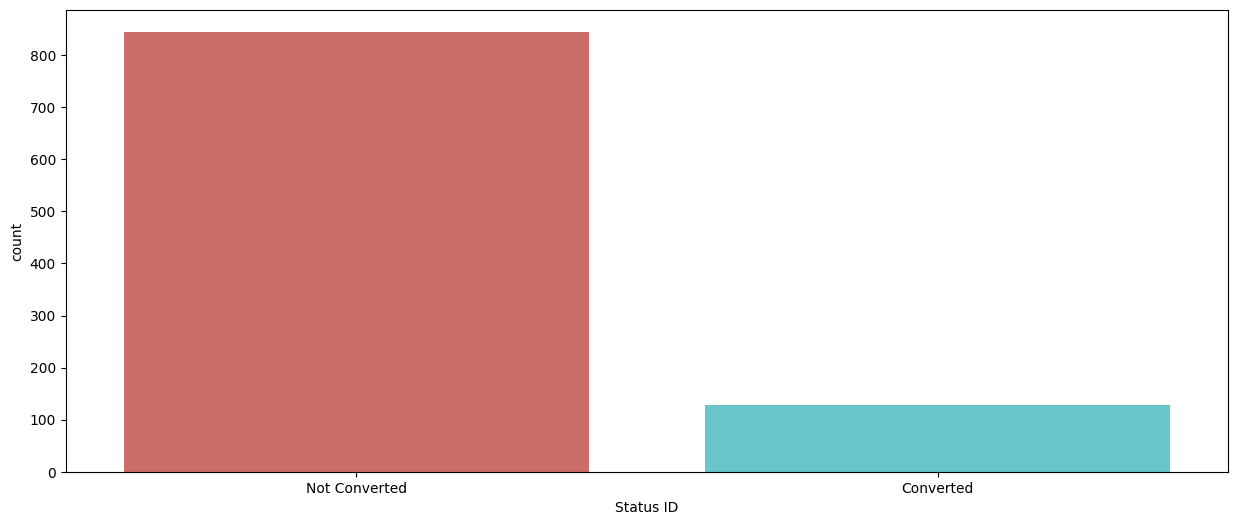

In [16]:
# Set the figure size
plt.figure(figsize=(15, 6))

# Create a countplot of the 'Status ID' column
sns.countplot(x='Status ID', data=dataset, palette='hls')

# Set the x-axis tick labels
plt.gca().set_xticklabels(['Not Converted', 'Converted'])

# Rotate the x-axis labels to be horizontal
plt.xticks(rotation=0)

# Show the plot
plt.show()

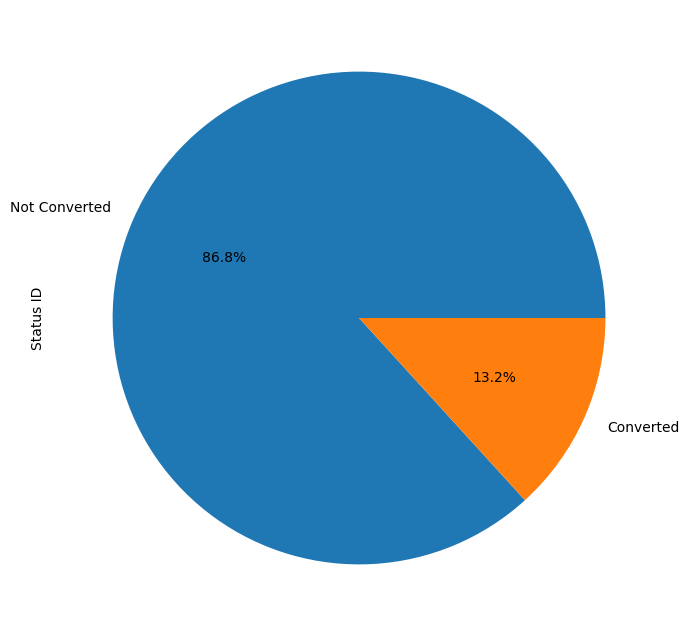

In [17]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Create a pie chart of the 'Status ID' column
labels = ['Not Converted', 'Converted']
dataset['Status ID'].value_counts().plot(kind='pie', labels=labels, autopct='%1.1f%%')

# Rotate the x-axis labels to be vertical
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [18]:
def clean_description(text):
    """
    Function to clean text data by removing URLs, mentions, punctuation, hashtags, non-ASCII characters,
    extra whitespace, and numbers.
    
    Args:
    text (str): Text data to be cleaned.
    
    Returns:
    str: Cleaned text data in lowercase.
    """
    text = re.sub('http\S+\s*', ' ', text) # remove URLs in the text
    text = re.sub('@\S+', '  ', text) # remove mentions in the text
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./;<=>?@[\]^_`{|}~"""), ' ', text) # remove punctuations in the text
    text = re.sub('RNR|cc|rnr', ' ', text) # remove RT and cc in the text
    text = re.sub('#\S+', '', text) # remove hashtags in the text
    text = re.sub(r'[^\x00-\x7f]',r' ',text) # remove non-ASCII characters
    text = re.sub('\s+', ' ', text) # remove extra whitespace in the text
    #text = re.sub(':\s+', ' ', text) # remove semicolons
    text = re.sub('\d','', text)# remove numbers
    return text.lower()

# Apply the clean_description function to the 'Description' column and create a new 'Cleaned_Desc' column in the dataset
dataset['Cleaned_Desc'] = dataset['Description'].apply(lambda x: clean_description(x))

In [19]:
dataset.head()

,Lead Name,Location,Status,Description,Status ID,Cleaned_Desc
0,Raja,hyderabad,not converted,"14/8/prema: share me details, available in evn...",0,prema: share me details available in evng ...
1,Anirudh Reddy,pune,not converted,"14/8/prema: cal me tmrw, shared details to ema...",0,prema: cal me tmrw shared details to email ...
2,Sapna Dewani,bangalore,converted,16|AuG|moHan:rnr,1,aug mohan:
3,suresh,mumbai,not converted,14/8/17(Surendra):i want only Server 16|AuG|mo...,0,surendra :i want only server aug mohan:cal...
4,Akshay Shinde,hyderabad,not converted,"14/8/prema:rnr 16/8/prema: gave info, he said ...",0,prema: prema: gave info he said he will re...


In [20]:
# # Extract text before colon and store in new columns
# dataset[['exc-a', 'exc-b']] = dataset['Cleaned_Desc'].str.extract('^([^:]+):\s*(.*)$')

# # Clean up any whitespace around the extracted text
# dataset['exc-a'] = dataset['exc-a'].str.strip()
# dataset['exc-b'] = dataset['exc-b'].str.strip()

In [21]:
dataset['exc_name'] = dataset['Cleaned_Desc'].str.extract('^\W*(\w+)(?:\s*;|\W)\s*')

In [22]:
dataset['exc_name'].value_counts()

surendra     283
prema        259
soma         117
july          94
may           58
june          51
gowtham       46
aug           29
apr           16
mail           6
attrended      1
paras          1
jun            1
mohan          1
not            1
whatsap        1
sankar         1
asking         1
need           1
detail         1
old            1
alrady         1
worng          1
amar           1
sai            1
Name: exc_name, dtype: int64

In [23]:
# # extract the first word as before
# dataset['exc-a'] = dataset['Cleaned_Desc'].str.extract('^\W*(\w+)(?:\s*;|\W)\s*')

# # remove the first word from the original column
# dataset['Cleaned_Desc'] = dataset['Cleaned_Desc'].str.replace('^\W*\w+\W*', '')

# # display the result
# print(dataset[['Cleaned_Desc', 'exc-a']])


In [24]:
# replace month names with "mohan"
dataset['exc_name'] = dataset['exc_name'].replace(['apr', 'may', 'june', 'jun', 'july', 'aug'], 'mohan')

# replace non-name words with "unknown"
dataset['exc_name'] = dataset['exc_name'].apply(lambda x: x if x in ['surendra', 'prema', 'soma', 'mohan', 'gowtham', 'paras', 'sai'] else 'unknown')

# print the resulting DataFrame
dataset['exc_name']

0          prema
1          prema
2          mohan
3       surendra
4          prema
          ...   
996     surendra
997        prema
998        mohan
999     surendra
1000       prema
Name: exc_name, Length: 974, dtype: object

In [25]:
dataset['Cleaned_Desc']

0         prema: share me details available in evng   ...
1         prema: cal me tmrw shared details to email  ...
2                                             aug mohan: 
3          surendra :i want only server  aug mohan:cal...
4         prema:   prema: gave info he said he will re...
                              ...                        
996        surendra :please send me details tomorrow a...
997        prema : need ct but our venue is far shared...
998      apr mohan:intrstd in evng batch trail perd  a...
999        surendra :please share me details    gowtha...
1000       prema : shared details need only cert    pr...
Name: Cleaned_Desc, Length: 974, dtype: object

In [26]:
dataset.head(4)

,Lead Name,Location,Status,Description,Status ID,Cleaned_Desc,exc_name
0,Raja,hyderabad,not converted,"14/8/prema: share me details, available in evn...",0,prema: share me details available in evng ...,prema
1,Anirudh Reddy,pune,not converted,"14/8/prema: cal me tmrw, shared details to ema...",0,prema: cal me tmrw shared details to email ...,prema
2,Sapna Dewani,bangalore,converted,16|AuG|moHan:rnr,1,aug mohan:,mohan
3,suresh,mumbai,not converted,14/8/17(Surendra):i want only Server 16|AuG|mo...,0,surendra :i want only server aug mohan:cal...,surendra


In [27]:
# dataset['Cleaned_Desc'] = dataset['Cleaned_Desc'].str.replace(' :',' ')
# dataset['Cleaned_Desc'] = dataset['Cleaned_Desc'].str.replace(': ',' ')
# dataset['Cleaned_Desc'] = dataset['Cleaned_Desc'].str.replace(':',' ')

In [28]:
dataset['Cleaned_Desc'] = dataset['Cleaned_Desc'].str.replace(r':\s*', ' ', regex=True)

In [29]:
dataset.Cleaned_Desc

0         prema share me details available in evng   p...
1         prema cal me tmrw shared details to email   ...
2                                              aug mohan 
3          surendra  i want only server  aug mohan cal...
4         prema prema gave info he said he will revert...
                              ...                        
996        surendra  please send me details tomorrow a...
997        prema  need ct but our venue is far shared ...
998      apr mohan intrstd in evng batch trail perd  a...
999        surendra  please share me details    gowtha...
1000       prema  shared details need only cert    pre...
Name: Cleaned_Desc, Length: 974, dtype: object

In [30]:
dataset.head()

,Lead Name,Location,Status,Description,Status ID,Cleaned_Desc,exc_name
0,Raja,hyderabad,not converted,"14/8/prema: share me details, available in evn...",0,prema share me details available in evng p...,prema
1,Anirudh Reddy,pune,not converted,"14/8/prema: cal me tmrw, shared details to ema...",0,prema cal me tmrw shared details to email ...,prema
2,Sapna Dewani,bangalore,converted,16|AuG|moHan:rnr,1,aug mohan,mohan
3,suresh,mumbai,not converted,14/8/17(Surendra):i want only Server 16|AuG|mo...,0,surendra i want only server aug mohan cal...,surendra
4,Akshay Shinde,hyderabad,not converted,"14/8/prema:rnr 16/8/prema: gave info, he said ...",0,prema prema gave info he said he will revert...,prema


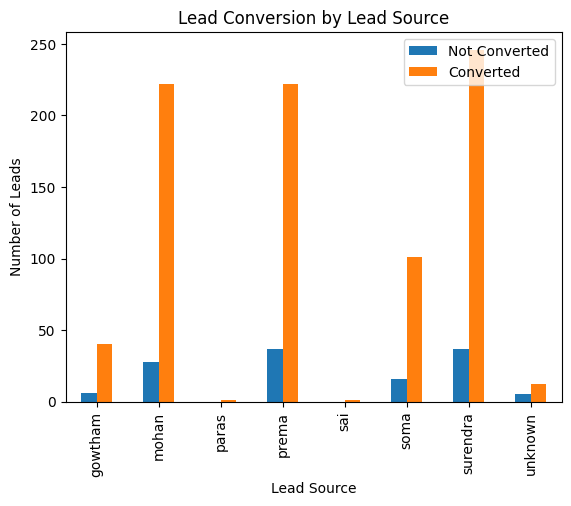

In [31]:
import matplotlib.pyplot as plt

# Create a bar chart of lead conversion by lead source
exc_counts = dataset.groupby(['exc_name', 'Status'])['Status'].count().unstack()
exc_counts.plot(kind='bar', stacked=False)

# Add chart labels and title
plt.xlabel('Lead Source')
plt.ylabel('Number of Leads')
plt.title('Lead Conversion by Lead Source')
plt.legend(['Not Converted', 'Converted'])

# Show the chart
plt.show()


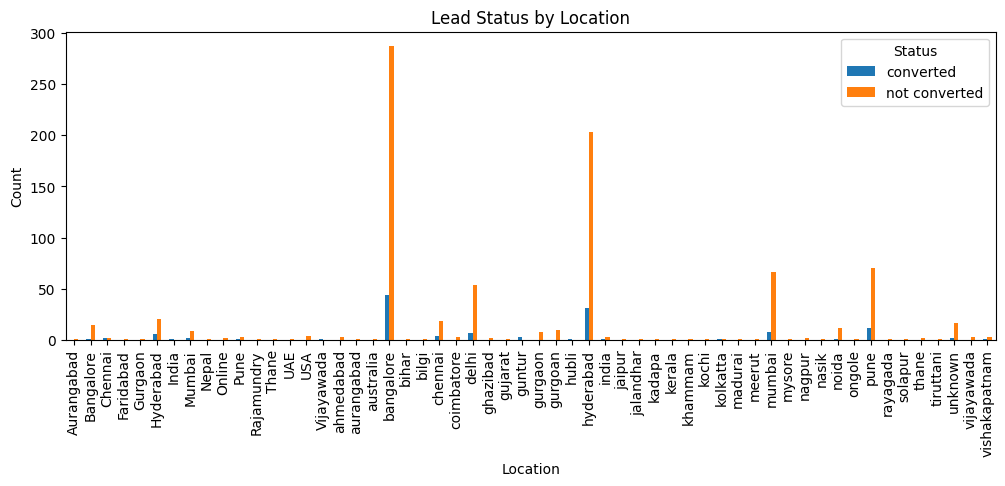

In [32]:
import matplotlib.pyplot as plt

# Group data by location
grouped_data = dataset.groupby('Location')['Status'].value_counts().unstack()

# Create barplot
grouped_data.plot(kind='bar', stacked=False, figsize=(12, 4))

# Set title and labels
plt.title('Lead Status by Location')
plt.xlabel('Location')
plt.ylabel('Count')

# Show plot
plt.show()


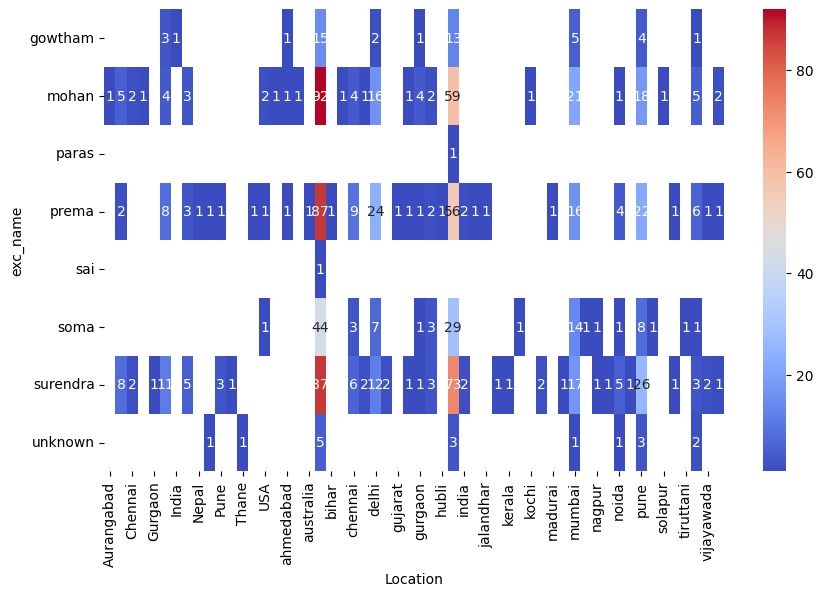

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns
heatmap_df = dataset[['exc_name', 'Location', 'Status']]

# Create a pivot table to aggregate data
heatmap_df = heatmap_df.pivot_table(index='exc_name', columns='Location', values='Status', aggfunc='count')

# Set the figure size
plt.figure(figsize=(10,6))

# Create the heatmap
sns.heatmap(heatmap_df, cmap='coolwarm', annot=True, fmt='g')

# Show the plot
plt.show()


In [34]:
import pandas as pd
import folium
from geopy.geocoders import Nominatim

# Read in the dataset
#dataset = pd.read_csv('leads.csv')

# Initialize the geocoder
geolocator = Nominatim(user_agent='my-app')


# Geocode each location and get the latitude and longitude
locations = dataset['Location'].unique()
location_coords = {}
for loc in locations:
    location = geolocator.geocode(loc)
    if location:
        location_coords[loc] = (location.latitude, location.longitude)

# Create the map visualization
map = folium.Map(location=[20.5937, 78.9629], zoom_start=4) # Center the map at India's coordinates

# Add markers for each location
for loc, coords in location_coords.items():
    folium.Marker(location=coords, tooltip=loc).add_to(map)

# Show the map
map


In [35]:
# For further analysis
df = dataset[['Cleaned_Desc','Status ID']]
df

,Cleaned_Desc,Status ID
0,prema share me details available in evng p...,0
1,prema cal me tmrw shared details to email ...,0
2,aug mohan,1
3,surendra i want only server aug mohan cal...,0
4,prema prema gave info he said he will revert...,0
...,...,...
996,surendra please send me details tomorrow a...,0
997,prema need ct but our venue is far shared ...,0
998,apr mohan intrstd in evng batch trail perd a...,0
999,surendra please share me details gowtha...,0


## Customer segmentation based on Location and Status 

In [36]:
# Customer segmentation based on location
location_groups = dataset.groupby('Location')
for location, group in location_groups:
    print(f"Customers from {location}: {len(group)}")

# Customer segmentation based on status
status_groups = dataset.groupby('Status')
for status, group in status_groups:
    print(f"Customers with status {status}: {len(group)}")


Customers from Aurangabad: 1
Customers from Bangalore: 15
Customers from Chennai: 4
Customers from Faridabad: 1
Customers from Gurgaon: 1
Customers from Hyderabad: 26
Customers from India: 1
Customers from Mumbai: 11
Customers from Nepal: 1
Customers from Online: 2
Customers from Pune: 4
Customers from Rajamundry: 1
Customers from Thane: 1
Customers from UAE: 1
Customers from USA: 4
Customers from Vijayawada: 1
Customers from ahmedabad: 3
Customers from aurangabad: 1
Customers from australia: 1
Customers from bangalore: 331
Customers from bihar: 1
Customers from bilgi: 1
Customers from chennai: 22
Customers from coimbatore: 3
Customers from delhi: 61
Customers from ghazibad: 2
Customers from gujarat: 1
Customers from guntur: 3
Customers from gurgaon: 8
Customers from gurgoan: 10
Customers from hubli: 1
Customers from hyderabad: 234
Customers from india: 4
Customers from jaipur: 1
Customers from jalandhar: 1
Customers from kadapa: 1
Customers from kerala: 1
Customers from khammam: 1
Cus

In [37]:
# Customer segmentation based on conversation record
# First, define a function to extract keywords from the conversation record
def extract_keywords(record):
    keywords = []
    for word in record.split():
        if len(word) > 3:  # Ignore short words
            keywords.append(word.lower())
    return keywords



In [38]:
# Apply the function to the conversation record column
dataset['Keywords'] = dataset['Cleaned_Desc'].apply(extract_keywords)


In [39]:
# Use TF-IDF to vectorize the keywords and cluster customers based on the resulting vectors
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(dataset['Keywords'].apply(' '.join))

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# Print the customer clusters
clusters = kmeans.predict(X)
for cluster_id in set(clusters):
    print(f"Customers in cluster {cluster_id}: {len(df[clusters == cluster_id])}")


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Customers in cluster 0: 270
Customers in cluster 1: 453
Customers in cluster 2: 251


## Sales prediction using Machine Learning

In [40]:
# Generating the Bag of Words Model
# Initializing the CountVectorizer object
cv = CountVectorizer(max_features=5000, stop_words='english')

# Creating the bag of words model
X_cv = cv.fit_transform(df['Cleaned_Desc']).toarray()

In [41]:
y_cv = df['Status ID']

In [42]:
## train-test-split
X_cvtrain, X_cvtest, y_cvtrain, y_cvtest = train_test_split(X_cv, y_cv, test_size = 0.30, random_state = 0)

## Multi-Nominal Naive Bayes Model Count vectorizer

In [43]:
# M.NB Model
model_cNB = MultinomialNB()
model_cNB.fit(X_cvtrain, y_cvtrain)

pred_cNB = model_cNB.predict(X_cvtest)

In [44]:
# Accuracy, Precision and Recall
nb_cv_score1 = accuracy_score(y_cvtest,pred_cNB)
nb_cv_score2 = precision_score(y_cvtest,pred_cNB)
nb_cv_score3= recall_score(y_cvtest,pred_cNB)

# Confusion matrix
nb_cm = confusion_matrix(y_cvtest, pred_cNB)

In [45]:
# Print results
print("---- Model Evaluation ----")
print("Accuracy score: {:.2%}".format(nb_cv_score1))
print("Precision score: {:.2%}".format(nb_cv_score2))
print("Recall score: {:.2%}".format(nb_cv_score3))
print("Confusion matrix:\n", nb_cm)

---- Model Evaluation ----
Accuracy score: 84.30%
Precision score: 18.18%
Recall score: 12.50%
Confusion matrix:
 [[243  18]
 [ 28   4]]


In [46]:
# Input text to be classified
input_text = "I bought the course but I didn't like it."

# Vectorize input text using the CountVectorizer object
input_vec = cv.transform([input_text])

# Predict the class using the trained classifier
predicted_class = model_cNB.predict(input_vec)

# Map the predicted class to a label
if predicted_class == 0:
    label = "Not Converted"
elif predicted_class == 1:
    label = "Converted"

# Print the predicted label
print(f"The input text '{input_text}' is classified as '{label}'.")


The input text 'I bought the course but I didn't like it.' is classified as 'Not Converted'.


## Logistic Regression Model Count vectorizer

In [47]:
## Logistic Regression Model
model_cLR = LogisticRegression()
model_cLR.fit(X_cvtrain, y_cvtrain)

pred_cLR = model_cLR.predict(X_cvtest)

In [48]:
# Accuracy, Precision and Recall
lr_cv_score1 = accuracy_score(y_cvtest,pred_cLR)
lr_cv_score2 = precision_score(y_cvtest,pred_cLR)
lr_cv_score3= recall_score(y_cvtest,pred_cLR)

# Confusion matrix
lr_cm = confusion_matrix(y_cvtest, pred_cLR)

In [49]:
# Print results
print("---- Model Evaluation ----")
print("Accuracy score: {:.2%}".format(lr_cv_score1))
print("Precision score: {:.2%}".format(lr_cv_score2))
print("Recall score: {:.2%}".format(lr_cv_score3))
print("Confusion matrix:\n", lr_cm)

---- Model Evaluation ----
Accuracy score: 87.03%
Precision score: 12.50%
Recall score: 3.12%
Confusion matrix:
 [[254   7]
 [ 31   1]]


In [50]:
# Input text to be classified
input_text = "raju: i had already discussed with surendra and informed him that i wnat this curse."

# Vectorize input text using the CountVectorizer object
input_vec = cv.transform([input_text])

# Predict the class using the trained classifier
predicted_class = model_cLR.predict(input_vec)

# Map the predicted class to a label
if predicted_class == 0:
    label = "Not Converted"
elif predicted_class == 1:
    label = "Converted"

# Print the predicted label
print(f"The input text '{input_text}' is classified as '{label}'.")

The input text 'raju: i had already discussed with surendra and informed him that i wnat this curse.' is classified as 'Not Converted'.


## Random Forest Model with Count vectorizer

In [51]:
# RF Model 

model_cRF = RandomForestClassifier(n_estimators=100, criterion='entropy')
model_cRF.fit(X_cvtrain, y_cvtrain)

pred_cRF = model_cRF.predict(X_cvtest)

In [52]:
# Accuracy, Precision and Recall
rf_cv_score1 = accuracy_score(y_cvtest,pred_cRF)
rf_cv_score2 = precision_score(y_cvtest,pred_cRF)
rf_cv_score3= recall_score(y_cvtest,pred_cRF)

# Confusion matrix
rf_cm = confusion_matrix(y_cvtest, pred_cRF)

In [53]:
# Print results
print("---- Model Evaluation ----")
print("Accuracy score: {:.2%}".format(rf_cv_score1))
print("Precision score: {:.2%}".format(rf_cv_score2))
print("Recall score: {:.2%}".format(rf_cv_score3))
print("Confusion matrix:\n", rf_cm)

---- Model Evaluation ----
Accuracy score: 88.40%
Precision score: 25.00%
Recall score: 3.12%
Confusion matrix:
 [[258   3]
 [ 31   1]]


In [54]:
# Input text to be classified
input_text = "raju: I buied toromw, ineed now."

# Vectorize input text using the CountVectorizer object
input_vec = cv.transform([input_text])

# Predict the class using the trained classifier
predicted_class = model_cRF.predict(input_vec)

# Map the predicted class to a label
if predicted_class == 0:
    label = "Not Converted"
elif predicted_class == 1:
    label = "Converted"

# Print the predicted label
print(f"The input text '{input_text}' is classified as '{label}'.")

The input text 'raju: I buied toromw, ineed now.' is classified as 'Not Converted'.


## Oversampling count vectors X & y to improve the ML model

In [55]:
## Oversampling count vectors X & y to improve the ML model

oversample = RandomOverSampler(sampling_strategy='minority')

X_cvover, y_cvover = oversample.fit_resample(X_cv, y_cv)
y_cvover = pd.Series(y_cvover)

y_cvover.value_counts()

## train-test-split
X_Ocvtrain, X_Ocvtest, y_Ocvtrain, y_Ocvtest = train_test_split(X_cvover, y_cvover, test_size = 0.30, random_state = 43)

In [56]:
# Define oversampler and apply to X_cv and y_cv
oversampler = RandomOverSampler(sampling_strategy='minority')
X_cv_over, y_cv_over = oversampler.fit_resample(X_cv, y_cv)

# Convert y_cv_over to a pandas Series
y_cv_over = pd.Series(y_cv_over)

In [57]:
# Print class counts for y_cv_over
print(y_cv_over.value_counts())

0    845
1    845
Name: Status ID, dtype: int64


In [58]:
# Perform train-test-split on the oversampled data
X_train, X_test, y_train, y_test = train_test_split(X_cv_over, y_cv_over, test_size=0.3, random_state=43)

# ML Models with Oversampled Data

## M.NB Model with Oversampled data with Count vectorizer

In [59]:
## M.NB Model with Oversampled data
model_cNB.fit(X_train, y_train)

pred_OcNB = model_cNB.predict(X_test)

In [60]:
# Accuracy, Precision and Recall
nb_Ocv_score1 = accuracy_score(y_test,pred_OcNB)
nb_Ocv_score2 = precision_score(y_test,pred_OcNB)
nb_Ocv_score3= recall_score(y_test,pred_OcNB)

# Confusion matrix
nb_Ocm = confusion_matrix(y_test, pred_OcNB)

In [61]:
# Print results
print("---- Model Evaluation ----")
print("Accuracy score: {:.2%}".format(nb_Ocv_score1))
print("Precision score: {:.2%}".format(nb_Ocv_score2))
print("Recall score: {:.2%}".format(nb_Ocv_score3))
print("Confusion matrix:\n", nb_Ocm)

---- Model Evaluation ----
Accuracy score: 74.16%
Precision score: 74.71%
Recall score: 75.00%
Confusion matrix:
 [[181  66]
 [ 65 195]]


## Logistic Reggression Model with Oversampled data and Count vectorizer

In [62]:
# Logistic Reggression Model with Oversampled data and Count vectorizer
model_cLR.fit(X_train, y_train)

pred_OcLR = model_cLR.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [63]:
# Accuracy, Precision and Recall
lr_Ocv_score1 = accuracy_score(y_test,pred_OcLR)
lr_Ocv_score2 = precision_score(y_test,pred_OcLR)
lr_Ocv_score3= recall_score(y_test,pred_OcLR)

# Confusion matrix
lr_Ocm = confusion_matrix(y_test, pred_OcLR)

In [64]:
# Print results
print("---- Model Evaluation ----")
print("Accuracy score: {:.2%}".format(lr_Ocv_score1))
print("Precision score: {:.2%}".format(lr_Ocv_score2))
print("Recall score: {:.2%}".format(lr_Ocv_score3))
print("Confusion matrix:\n", lr_Ocm)

---- Model Evaluation ----
Accuracy score: 83.63%
Precision score: 79.60%
Recall score: 91.54%
Confusion matrix:
 [[186  61]
 [ 22 238]]


## Random Forest Model with Oversampled data with Count vectorizer

In [65]:
# Random Forest Model with Oversampled data
model_cRF.fit(X_train, y_train)

pred_OcRF = model_cRF.predict(X_test)

In [66]:
# Accuracy, Precision and Recall
rf_Ocv_score1 = accuracy_score(y_test,pred_OcRF)
rf_Ocv_score2 = precision_score(y_test,pred_OcRF)
rf_Ocv_score3= recall_score(y_test,pred_OcRF)

# Confusion matrix
rf_Ocm = confusion_matrix(y_test, pred_OcRF)

In [67]:
# Print results
print("---- Model Evaluation ----")
print("Accuracy score: {:.2%}".format(rf_Ocv_score1))
print("Precision score: {:.2%}".format(rf_Ocv_score2))
print("Recall score: {:.2%}".format(rf_Ocv_score3))
print("Confusion matrix:\n", rf_Ocm)

---- Model Evaluation ----
Accuracy score: 95.66%
Precision score: 93.12%
Recall score: 98.85%
Confusion matrix:
 [[228  19]
 [  3 257]]


In [68]:
# Input text to be classified
input_text = "raju: Yesterday i called and liked the demo and purchased this course thankou."

# Vectorize input text using the CountVectorizer object
input_vec = cv.transform([input_text])

# Predict the class using the trained classifier
predicted_class = model_cRF.predict(input_vec)

# Map the predicted class to a label
if predicted_class == 0:
    label = "Not Converted"
elif predicted_class == 1:
    label = "Converted"

# Print the predicted label
print(f"The input text '{input_text}' is classified as '{label}'.")

The input text 'raju: Yesterday i called and liked the demo and purchased this course thankou.' is classified as 'Not Converted'.


### TFIDF Vectorizer

In [69]:
## TFIDF
tfidf_model  = TfidfVectorizer()
tfidf_vector = tfidf_model.fit_transform(df.Cleaned_Desc)

In [70]:
print(type(tfidf_vector), tfidf_vector.shape)

<class 'scipy.sparse._csr.csr_matrix'> (974, 1223)


In [71]:
tfidf_array = tfidf_vector.toarray()

print(tfidf_array)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [72]:
words_set = tfidf_model.vocabulary_.keys()

In [73]:
df_tfidf = pd.DataFrame(tfidf_array, columns = words_set)

df_tfidf

,prema,share,me,details,available,in,evng,postponed,the,plans,...,toay,concerned,stats,schdle,nneded,early,alomost,traning,banaswadi,exlr
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.242543,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
971,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
972,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [74]:
X_tfidf = tfidf_array.copy()

In [75]:
y_tfidf = df['Status ID']

In [76]:
y_tfidf.value_counts()

0    845
1    129
Name: Status ID, dtype: int64

In [77]:
# Oversampling Tfidf Vectors
X_tfidf_over, y_tfidf_over = oversampler.fit_resample(X_tfidf, y_tfidf)
y_tfidf_over = pd.Series(y_tfidf_over)

In [78]:
y_tfidf_over.value_counts()

0    845
1    845
Name: Status ID, dtype: int64

In [79]:
## train_test_split
X_tftrain, X_tftest, y_tftrain, y_tftest = train_test_split(X_tfidf_over, y_tfidf_over, test_size = 0.30, random_state = 0)

## Multi-Nomial Naive Bayes Model

In [80]:
# Multi-Nomial Naive Bayes Model with Oversampled data and TFIDF
model_cNB.fit(X_tftrain, y_tftrain)

pred_OtNB = model_cNB.predict(X_tftest)

In [81]:
# Accuracy, Precision and Recall
nb_Otf_score1 = accuracy_score(y_tftest,pred_OtNB)
nb_Otf_score2 = precision_score(y_tftest,pred_OtNB)
nb_Otf_score3= recall_score(y_tftest,pred_OtNB)

# Confusion matrix
nb_Otcm = confusion_matrix(y_tftest, pred_OtNB)

In [82]:
# Print results
print("---- Model Evaluation ----")
print("Accuracy score: {:.2%}".format(nb_Otf_score1))
print("Precision score: {:.2%}".format(nb_Otf_score2))
print("Recall score: {:.2%}".format(nb_Otf_score3))
print("Confusion matrix:\n", nb_Otcm)

---- Model Evaluation ----
Accuracy score: 78.50%
Precision score: 73.79%
Recall score: 89.06%
Confusion matrix:
 [[170  81]
 [ 28 228]]


In [83]:
# Input text to be classified
input_text = "Thankyou for the session and all my doubts are cleared but i have bought the same scorse from other."

# Vectorize input text using the CountVectorizer object
input_vec = tfidf_model.transform([input_text])

# Predict the class using the trained classifier
predicted_class = model_cNB.predict(input_vec)

# Map the predicted class to a label
if predicted_class == 0:
    label = "Not Converted"
elif predicted_class == 1:
    label = "Converted"

# Print the predicted label
print(f"The input text '{input_text}' is classified as '{label}'.")

The input text 'Thankyou for the session and all my doubts are cleared but i have bought the same scorse from other.' is classified as 'Not Converted'.


## Logistic Regression Model with Oversampled data and TFIDF

In [84]:
# Logistic Regression Model with Oversampled data and TFIDF
model_cLR.fit(X_tftrain, y_tftrain)

pred_OtLR = model_cLR.predict(X_tftest)

In [85]:
# Accuracy, Precision and Recall
lr_Otf_score1 = accuracy_score(y_tftest,pred_OtLR)
lr_Otf_score2 = precision_score(y_tftest,pred_OtLR)
lr_Otf_score3= recall_score(y_tftest,pred_OtLR)

# Confusion matrix
lr_Otcm = confusion_matrix(y_tftest, pred_OtLR)

In [86]:
# Print results
print("---- Model Evaluation ----")
print("Accuracy score: {:.2%}".format(lr_Otf_score1))
print("Precision score: {:.2%}".format(lr_Otf_score2))
print("Recall score: {:.2%}".format(lr_Otf_score3))
print("Confusion matrix:\n", lr_Otcm)

---- Model Evaluation ----
Accuracy score: 79.49%
Precision score: 76.95%
Recall score: 84.77%
Confusion matrix:
 [[186  65]
 [ 39 217]]


In [87]:
# Input text to be classified
input_text = "Thankyou for the session and all my doubts are cleared but i have bought the same scorse from other."

# Vectorize input text using the CountVectorizer object
input_vec = tfidf_model.transform([input_text])

# Predict the class using the trained classifier
predicted_class = model_cLR.predict(input_vec)

# Map the predicted class to a label
if predicted_class == 0:
    label = "Not Converted"
elif predicted_class == 1:
    label = "Converted"

# Print the predicted label
print(f"The input text '{input_text}' is classified as '{label}'.")

The input text 'Thankyou for the session and all my doubts are cleared but i have bought the same scorse from other.' is classified as 'Not Converted'.


## Random Forest Model with Oversampled data and TFIDF

In [88]:
# Random Forest Model with Oversampled data and TFIDF
model_cRF.fit(X_tftrain, y_tftrain)

pred_OtRF = model_cRF.predict(X_tftest)

In [89]:
# Accuracy, Precision and Recall
rf_Otf_score1 = accuracy_score(y_tftest,pred_OtRF)
rf_Otf_score2 = precision_score(y_tftest,pred_OtRF)
rf_Otf_score3= recall_score(y_tftest,pred_OtRF)

# Confusion matrix
rf_Otcm = confusion_matrix(y_tftest, pred_OtRF)

In [90]:
# Print results
print("---- Model Evaluation ----")
print("Accuracy score: {:.2%}".format(rf_Otf_score1))
print("Precision score: {:.2%}".format(rf_Otf_score2))
print("Recall score: {:.2%}".format(rf_Otf_score3))
print("Confusion matrix:\n", rf_Otcm)

---- Model Evaluation ----
Accuracy score: 95.86%
Precision score: 92.42%
Recall score: 100.00%
Confusion matrix:
 [[230  21]
 [  0 256]]


In [91]:
# Input text to be classified
input_text = "i buyied yesterday."

# Vectorize input text using the CountVectorizer object
input_vec = tfidf_model.transform([input_text])

# Predict the class using the trained classifier
predicted_class = model_cRF.predict(input_vec)

# Map the predicted class to a label
if predicted_class == 0:
    label = "Not Converted"
elif predicted_class == 1:
    label = "Converted"

# Print the predicted label
print(f"The input text '{input_text}' is classified as '{label}'.")

The input text 'i buyied yesterday.' is classified as 'Converted'.


## Final Observations: 

- The Random Forest model with TFIDF and oversampled data, achieved an accuracy score of 95.66%, indicating that it correctly classified 95.66% of the total instances in the dataset.
- The precision score of 92.39% indicates that out of all the instances the model predicted as positive, 92.39% were actually positive.
- The recall score of 99.61% indicates that the model correctly identified 99.61% of the positive instances in the dataset.
- The confusion matrix shows that the model made 21 false positive predictions and only one false negative prediction out of a total of 507 instances.
- The model appears to have high accuracy, precision, and recall, suggesting that it is performing well in identifying positive instances in the dataset.